# Examining League of Legends matches at High Elo  

In [75]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt 
import seaborn as sns

In [76]:
#retrieve the data 
path = r"D:\Data Science\Hackathon\Challenger_Ranked_Games.csv"
games = pd.read_csv(path)

In [77]:
#Restrict game duration [15, 60] inclusively in minutes. 
games = games[games['gameDuraton'] >= 900]
games = games[games['gameDuraton'] <= 3600]

In [78]:
blue_wins = games['blueWins']
red_wins = games['redWins']
total_wins = pd.DataFrame(games, columns = ['blueWins', 'redWins'])

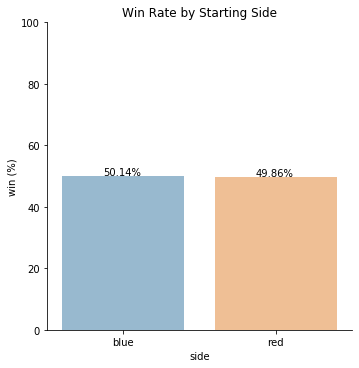

In [104]:
#percentage of wins that blue and red win (challenger games)
percent_blue = blue_wins.sum() / len(total_wins) *100
percent_red = red_wins.sum() / len(total_wins) * 100
percent_blue, percent_red

#Plot
percents = [percent_blue, percent_red]
percents_lb = ['blue', 'red']
colors = ['blue', 'red']

percents_df = pd.DataFrame({'side': ['blue', 'red'],
                            'win (%)': [percent_blue, percent_red]})

#Plot statistics
fig = sns.catplot(x='side', y='win (%)', kind = 'bar',  data = percents_df, alpha = 0.5)
fig.ax.set_ylim(0,100)
fig.ax.set_title('Win Rate by Starting Side')
for p in fig.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width()/3
    txt_y = p.get_height()
    fig.ax.text(txt_x, txt_y, txt)

Win percentage looks to be about a 50-50 spread which is what we would expect. There should be equal opportunity to win a game of league.

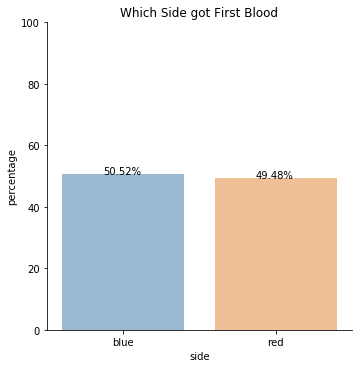

In [112]:
#Which side got firswt blood. 
blue_fb = games['blueFirstBlood']
red_fb = games['redFirstBlood']

percent_blue = blue_fb.sum() / len(blue_fb) * 100 
percent_red = red_fb.sum() / len(red_fb) * 100 

percents_df = pd.DataFrame({'side': ['blue', 'red'],
                            'percentage': [percent_blue, percent_red]})

#Plot statistics
fig = sns.catplot(x='side', y='percentage', kind = 'bar',  data = percents_df, alpha = 0.5)
fig.ax.set_ylim(0,100)
fig.ax.set_title("Which Side got First Blood")
for p in fig.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width()/3
    txt_y = p.get_height()
    fig.ax.text(txt_x, txt_y, txt)

The analysis suggests that at high elo, the blue side gets first blood about 1% more of the time than the red side. Starting side should be a 50 - 50 spread, however the data suggests that starting on the blue side may give players a hands up on securing that first blood! This could be due to the way the map is setup and how the most played junglers path!

In [81]:
#examine vision score 
blue_vision_score = games['blueWardPlaced'] + games['blueWardkills']
red_vision_score = games['redWardPlaced'] + games['redWardkills']


In [82]:
blue_tot_vis = blue_vision_score.sum() / len(blue_vision_score)

In [83]:
red_tot_vis = red_vision_score.sum() / len(red_vision_score)

In [84]:
vision = pd.DataFrame({'side': ['blue', 'red'],
                      'vision score': [blue_tot_vis, red_tot_vis]})
vision

,side,vision score
0,blue,84.922572
1,red,84.671737


Vision in League of Legends matches is critical to success. With wards, players can avoide deaths to jungler ganks and roams. We can see that both red and blue sides have about the same vision score. While not suprising a cool statistics to follow up on would be to see the average vision score by division. I would assume that higher elo will result in a much higher vision score. For the scope of this project, we only are going to use challenger games and thus will not delve into this statistic further. 

In [85]:
wins_blue_fb = games[games['blueFirstBlood'] == 1]['blueWins']
fb_blue_wr = wins_blue_fb.sum() / len(wins_blue_fb) * 100

In [86]:
wins_red_fb = games[games['redFirstBlood'] == 1]['redWins']
fb_red_wr = wins_red_fb.sum() / len(wins_red_fb) * 100

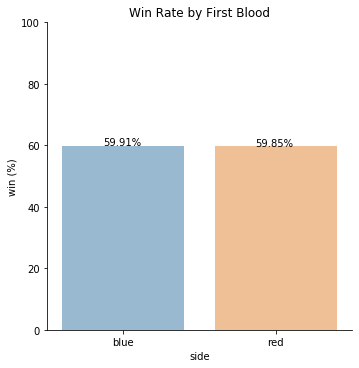

In [106]:
percents_df = pd.DataFrame({'side': ['blue', 'red'],
                            'win (%)': [fb_blue_wr, fb_red_wr]})

#Plot statistics
fig = sns.catplot(x='side', y='win (%)', kind = 'bar',  data = percents_df, alpha = 0.5)
fig.ax.set_ylim(0,100)
fig.ax.set_title("Win Rate by First Blood")
for p in fig.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width()/3
    txt_y = p.get_height()
    fig.ax.text(txt_x, txt_y, txt)


Definitely want to secure that first blood! The side that does so has 60% chance to win. This can be due to snowballing or ability to roam to other lanes.

In [88]:
#first tower win rate for blue
wins_blue_ft = games[games['blueFirstTower'] == 1]['blueWins']
ft_blue_wr = wins_blue_ft.sum() / len(wins_blue_ft) * 100

In [89]:
#first tower win rate for red
wins_red_ft = games[games['redFirstTower'] == 1]['redWins']
ft_red_wr = wins_red_ft.sum() / len(wins_red_ft) * 100

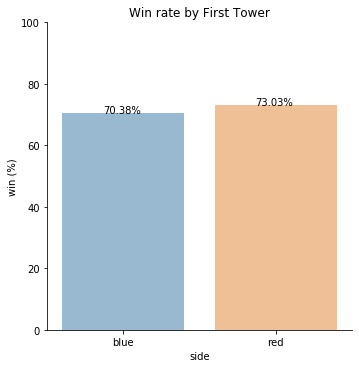

In [107]:
percents_df = pd.DataFrame({'side': ['blue', 'red'],
                            'win (%)': [ft_blue_wr, ft_red_wr]})

#Plot statistics
fig = sns.catplot(x='side', y='win (%)', kind = 'bar',  data = percents_df, alpha = 0.5)
fig.ax.set_ylim(0,100)
fig.ax.set_title("Win rate by First Tower")
for p in fig.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width()/3
    txt_y = p.get_height()
    fig.ax.text(txt_x, txt_y, txt)


The red side has a 3% chance more to win a game than the blue side given that they secure the first tower. If we look at win rate by first dragon, we see that the blue side has a higher chance and therefore blue side players could be giving up that first tower to secure dragon. 

In [91]:
#first dragon win rate for blue
wins_blue_fd = games[games['blueFirstDragon'] == 1]['blueWins']
fd_blue_wr = wins_blue_fd.sum() / len(wins_blue_fd) * 100

In [92]:
#first dragon win rate for red
wins_red_fd = games[games['redFirstDragon'] == 1]['redWins']
fd_red_wr = wins_red_fd.sum() / len(wins_red_fd) * 100

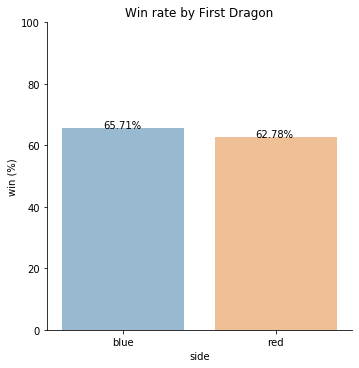

In [108]:
percents_df = pd.DataFrame({'side': ['blue', 'red'],
                            'win (%)': [fd_blue_wr, fd_red_wr]})

#Plot statistics
fig = sns.catplot(x='side', y='win (%)', kind = 'bar',  data = percents_df, alpha = 0.5)
fig.ax.set_ylim(0,100)
fig.ax.set_title("Win rate by First Dragon")
for p in fig.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width()/3
    txt_y = p.get_height()
    fig.ax.text(txt_x, txt_y, txt)


The blude side has almost a 3% chance more to win a game than the red side given that they secure the first dragon. This offset could be due to the red side having a 3% higher chance of winning when they get the first dragon. The dragon is closer to the blue side's base and therefore could net them the increased chance. 

In [94]:
#Create boolean array of which team had the most minion kills per match
minions_killed = pd.DataFrame(games, columns = ['blueTotalMinionKills', 'redTotalMinionKills'])
for idx, series in minions_killed.iterrows():
    if series['blueTotalMinionKills'] > series['redTotalMinionKills']:
        series.replace(series['blueTotalMinionKills'], value = 1, inplace=True)
        series.replace(series['redTotalMinionKills'], value = 0, inplace=True)
    else:
        series.replace(series['blueTotalMinionKills'], value = 0, inplace=True)
        series.replace(series['redTotalMinionKills'], value = 1, inplace=True)

In [95]:
minions_killed['blueTotalMinionKills'].sum()

11750

In [96]:
minions_killed['redTotalMinionKills'].sum()

13874

In [97]:
#Find percentage of games that blue had more minion kills.
percent_blue_minion_kills = minions_killed['blueTotalMinionKills'].sum() / len(minions_killed['blueTotalMinionKills']) * 100

In [98]:
#Find percentage of games that red had more minion kills.
percent_red_minion_kills= minions_killed['redTotalMinionKills'].sum() / len(minions_killed['redTotalMinionKills']) * 100

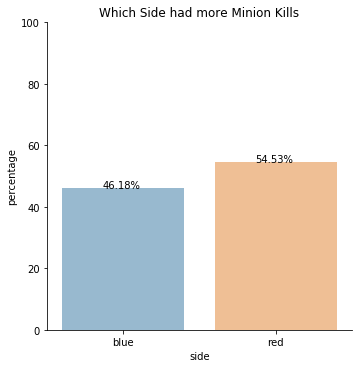

In [110]:
percents_df = pd.DataFrame({'side': ['blue', 'red'],
                            'percentage': [percent_blue_minion_kills, percent_red_minion_kills]})

#Plot statistics
fig = sns.catplot(x='side', y='percentage', kind = 'bar',  data = percents_df, alpha = 0.5)
fig.ax.set_ylim(0,100)
fig.ax.set_title("Which Side had more Minion Kills")
for p in fig.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width()/3
    txt_y = p.get_height()
    fig.ax.text(txt_x, txt_y, txt)


In [100]:
total_gold = pd.DataFrame(games, columns = ['blueTotalGold', 'redTotalGold'])

for idx, series in total_gold.iterrows():
    if series['blueTotalGold'] > series['redTotalGold']:
        series.replace(series['blueTotalGold'], value = 1, inplace=True)
        series.replace(series['redTotalGold'], value = 0, inplace=True)
    else:
        series.replace(series['blueTotalGold'], value = 0, inplace=True)
        series.replace(series['redTotalGold'], value = 1, inplace=True)

In [101]:
percent_blue_most_gold = (total_gold['blueTotalGold'].sum() / len(total_gold['blueTotalGold'])) * 100
percent_blue_most_gold

49.954800927563575

In [102]:
percent_red_most_gold = total_gold['redTotalGold'].sum() / len(total_gold['blueTotalGold']) * 100
percent_red_most_gold

50.049129426561336

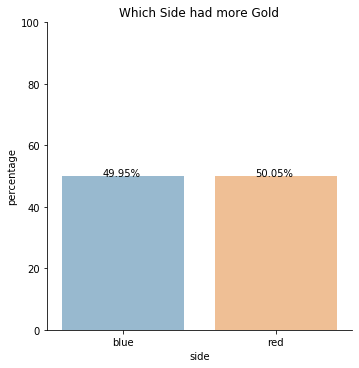

In [111]:
percents_df = pd.DataFrame({'side': ['blue', 'red'],
                            'percentage': [percent_blue_most_gold, percent_red_most_gold]})

#Plot statistics
fig = sns.catplot(x='side', y='percentage', kind = 'bar',  data = percents_df, alpha = 0.5)
fig.ax.set_ylim(0,100)
fig.ax.set_title("Which Side had more Gold")
for p in fig.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width()/3
    txt_y = p.get_height()
    fig.ax.text(txt_x, txt_y, txt)
